# Here we are going to create a Convolution Neural Network(CNN) model on Car Images Dataset which is used to predict cars of seven category i.e Audi,Hyundai Creta,Mahindra Scorpio,Rolls Royce,Maruti Suzuki Swift,Tata Safari and Toyota Innova.

# Why CNN?

As we know that image classification involves extraction of features from the image to observe some patterns in the dataset. The CNN follows a hierarchical model which works on building a network, like a funnel, and finally gives out a fully-connected layer(dense layer) where all the neurons are connected to each other and the output is processed.CNNs are very effective in reducing the number of parameters without losing on the quality of models. Images have high dimensionality (as each pixel is considered as a feature) which suits the above described abilities of CNNs.In CNN dimensionalty reduction is achieved using a sliding window with a size less than that of the input matrix.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import pandas as pd 

IMG_SIZE=128

# Importing data into tensorflow dataset object

# Lets we understand what ImageDataGenerator do...

This will run through image data and apply random transformations to each individual image as it is passed to the model so that it never sees the exact same image twice during training.
The benefit here is that the model will become more robust as it trains on images that are slightly distorted, and it helps to prevent the model from learning noise in the data such as where features are located in the image.

In [2]:
train_data = ImageDataGenerator(rescale=1./255,rotation_range=10,horizontal_flip=True)

In [3]:
test_data = ImageDataGenerator(rescale=1./255,rotation_range=1,horizontal_flip=True)

In [4]:
x_train=train_datagen.flow_from_directory(r'E:\archive\Cars Dataset\train',target_size=(IMG_SIZE,IMG_SIZE),class_mode='sparse',batch_size=100)

Found 3352 images belonging to 7 classes.


In [5]:
len(x_train)

34

In [6]:
x_test = test_data.flow_from_directory(r'C:\cars data',target_size=(IMG_SIZE,IMG_SIZE),class_mode='sparse',batch_size=100)

Found 813 images belonging to 7 classes.


In [7]:
len(x_test)

9

In [8]:
x_train.class_indices

{'Audi': 0,
 'Hyundai Creta': 1,
 'Mahindra Scorpio': 2,
 'Rolls Royce': 3,
 'Swift': 4,
 'Tata Safari': 5,
 'Toyota Innova': 6}

# Creating the CNN model

# How to stack up layers?

There are three types of layers that make up the CNN which are the convolutional layers, pooling layers, and fully-connected layers. When these layers are stacked, a CNN architecture will be formed.
Convolution->Relu->Pooling->Convolution->Relu->Pooling->Flattening->Fully Connected layer

CNN Layer-This layer is the first layer that is used to extract the various features from the input images.

Pooling layer-It is to decrease the size of the convolved feature map to reduce the computational costs. This is performed by decreasing the connections between layers and independently operates on each feature map.

Fully Connected layer-It consists of the weights and biases along with the neurons and is used to connect the neurons between two different layers.

Dropout-To overcome overfitting problem, a dropout layer is utilised wherein a few neurons are dropped from the neural network during training process resulting in reduced size of the model.

Relu Activation Function-It decides which information of the model should be send in the forward direction and which ones should not at the end of the network.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
sz = 128

In [10]:
car_model=Sequential()

In [11]:
car_model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(sz,sz,3)))

In [12]:
car_model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
car_model.add(Convolution2D(32, (3, 3), activation='relu'))

In [14]:
car_model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
car_model.add(Flatten())

In [16]:
car_model.add(Dense(units=96, activation='relu'))
car_model.add(Dense(units=32, activation='relu'))
car_model.add(Dense(units=7, activation='softmax'))

In [17]:
car_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 96)                2

In [23]:
car_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
car_model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=50,validation_data=x_test,validation_steps=len(x_test))

<ipython-input-24-0710b97425cf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_car.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=50,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/50
34/34 [==============================] - 65s 2s/step - loss: 1.9771 - accuracy: 0.2405 - val_loss: 1.8552 - val_accuracy: 0.2583
Epoch 2/50
34/34 [==============================] - 63s 2s/step - loss: 1.7964 - accuracy: 0.3088 - val_loss: 1.6864 - val_accuracy: 0.3739
Epoch 3/50
34/34 [==============================] - 65s 2s/step - loss: 1.6093 - accuracy: 0.4218 - val_loss: 1.5614 - val_accuracy: 0.4194
Epoch 4/50
34/34 [==============================] - 65s 2s/step - loss: 1.4489 - accuracy: 0.4824 - val_loss: 1.4665 - val_accuracy: 0.4502
Epoch 5/50
34/34 [==============================] - 62s 2s/step - loss: 1.3153 - accuracy: 0.5325 - val_loss: 1.3353 - val_accuracy: 0.5301
Epoch 6/50
34/34 [==============================] - 63s 2s/step - loss: 1.1688 - accuracy: 0.5946 - val_loss: 1.2828 - val_accuracy: 0.5658
Epoch 7/50
34/34 [==============================] - 62s 2s/step - loss: 1.0810 - accuracy: 0.6301 - val_loss: 1.1944 - val_accuracy: 0.5879
Epoch 8/50
34/34 [==

In [25]:
car_model.save('car.h5')

In [26]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
car_model=load_model('car.h5')

In [29]:
img=image.load_img(r'C:\cars data\Hyundai Creta\53.jpg',target_size=(IMG_SIZE,IMG_SIZE))

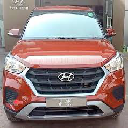

In [30]:
img

In [31]:
x=image.img_to_array(img)

In [32]:
x

array([[[178., 184., 184.],
        [188., 193., 189.],
        [185., 184., 179.],
        ...,
        [225., 218., 210.],
        [218., 213., 209.],
        [217., 213., 210.]],

       [[184., 190., 190.],
        [192., 197., 193.],
        [187., 186., 181.],
        ...,
        [225., 218., 210.],
        [218., 213., 209.],
        [217., 213., 210.]],

       [[182., 188., 188.],
        [190., 195., 191.],
        [185., 184., 179.],
        ...,
        [225., 218., 210.],
        [218., 213., 209.],
        [217., 213., 210.]],

       ...,

       [[174., 164., 163.],
        [180., 170., 169.],
        [177., 167., 166.],
        ...,
        [146., 134., 134.],
        [149., 137., 137.],
        [152., 140., 140.]],

       [[183., 173., 164.],
        [185., 174., 168.],
        [156., 145., 139.],
        ...,
        [148., 132., 133.],
        [149., 133., 134.],
        [150., 134., 135.]],

       [[162., 152., 143.],
        [177., 166., 160.],
        [169., 1

In [33]:
x=np.expand_dims(x,axis=0)

In [35]:
x.ndim

4

In [36]:
pred=np.argmax(model_car.predict(x),axis=1) #1 = row

In [37]:
pred

array([1], dtype=int64)

In [38]:
index=['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari',
'Toyota Innova']
print(index[pred[0]])

Hyundai Creta


In [39]:
import cv2
img=cv2.imread(r'C:\cars data\Hyundai Creta\53.jpg',1)

In [40]:
img

array([[[184, 184, 178],
        [190, 192, 186],
        [191, 192, 190],
        ...,
        [209, 213, 218],
        [203, 206, 210],
        [210, 213, 217]],

       [[187, 187, 181],
        [192, 194, 188],
        [193, 194, 192],
        ...,
        [209, 213, 218],
        [203, 206, 210],
        [210, 213, 217]],

       [[190, 190, 184],
        [195, 197, 191],
        [195, 196, 194],
        ...,
        [209, 213, 218],
        [203, 206, 210],
        [210, 213, 217]],

       ...,

       [[168, 172, 183],
        [174, 178, 189],
        [170, 174, 185],
        ...,
        [134, 134, 148],
        [134, 133, 149],
        [135, 135, 149]],

       [[134, 140, 151],
        [145, 151, 162],
        [151, 157, 168],
        ...,
        [134, 133, 149],
        [134, 133, 149],
        [135, 134, 150]],

       [[145, 151, 162],
        [156, 162, 173],
        [160, 166, 177],
        ...,
        [133, 132, 148],
        [134, 133, 149],
        [134, 133, 149]]

In [41]:
img1=cv2.imread(r'C:\cars data\Hyundai Creta\53.jpg',0)

In [42]:
img1

array([[182, 190, 191, ..., 214, 207, 214],
       [185, 192, 193, ..., 214, 207, 214],
       [188, 195, 195, ..., 214, 207, 214],
       ...,
       [175, 181, 177, ..., 138, 138, 139],
       [143, 154, 160, ..., 138, 138, 139],
       [154, 165, 169, ..., 137, 138, 138]], dtype=uint8)

In [43]:
img=cv2.imread(r'C:\cars data\Hyundai Creta\53.jpg',1)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [64]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('car.h5')
video=cv2.VideoCapture(0)
index=['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari',
'Toyota Innova']
while 1:
    succcess,frame=video.read()
    cv2.imwrite('image_car.jpg',frame)
    img=image.load_img('image_car.jpg',target_size=(128,128))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    pred=np.argmax(model.predict(x),axis=1)
    y=pred[0]
    cv2.putText(frame,'the predicted car model is: '+str(index[y]),(5,350),cv2.cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 0, 255), 2)
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
video.release()
cv2.destroyAllWindows()